# Elements of Machine Learning: Solving Regression Problems

### A introductory session for machine learning and its application to geospatial problems 

##### Dr. Jiong (Jon) Wang,  j.wang2@uu.nl


## Foreword
-------------------
**Regression** techniques are used for exploring potential dependencies among phenomena. Better understanding of the dependencies not only uncovers the mechanisms of interactions among phenomena in a system, but also helps to make predictions about the dynamics of one phenomenon if we know the change of another if dependencies can be found between two phenomena in a system. For instance, if we have observed air pollutants accumulation patterns in a city is dependent upon the morphology of urban elements in this city, such as road network density or building density, then, not only we would acquire knowledge about the interaction between urban elements and air pollutants within this city-atmospheric system, but also we can predict air pollution everywhere around the city by measuring street patterns from *Open Street Map* without putting expensive sensors densely around the entire city.

To explore dependencies among phenomena, we rely on measurements which are essentially discrete samples. Such as air pollution concentration at a certain location within a city, or road configuration/density within a buffer at this location. Here, the phenomena air pollution and road network configuration are measured by **variables** pollution concentration and road density. And the dependencies between the two phenomena is characterized by statistical measurements of the relationship between the two variables. This measured relationship is finally used to make predictions everywhere we don't have measurements for both variables but only one of them. Hence if we have one of the variable measured everywhere, it is then posssible to predict the other variable everywhere. This is why **regression** has been summaried as *a technique of using discrete values for predicting continues values*.

In *machine learning*, exploring dependencies is achieved by training an **assumed/hypothesized** model **M** by using the measured or observed discrete **variables** **X** and **Y** to capture the relationship between **X** and **Y**. For example, *machine learning* can be used to train and fit a *linear model* 

**M(X) = θ<sup>T</sup>X** 

to the **X** and **Y** by searching optimal **θ** through [*gradient descent*](https://en.wikipedia.org/wiki/Gradient_descent). Thus *machine learning* serves to solve the well known conventional *Ordinary Least Squares (OLS)* problem as *analytical solution* is not alway feasible with many observations/measurements in a big dataset. But *machine learning* is definitely not restricted only to solve OLS problems. In fact, *machine learning* allows you to solve **regression** problems in flexible ways, where you can train your model to fit the data while taking care of several issues such as big data, model complexity, bias-variance trade-off, and variable selection.

On this page, you will be able to walk through the basics and common issues in *machine learning* based **regression** techniques. You will start by working with the simplest scenario: linear model fitting in 1-dimension, where there is only one variable *x* in **X** leading to **M(X)** as 

**M(x) = θ<sub>1</sub> + θ<sub>2</sub>x**. 

Soon after experimenting with this simple setup, you will be training a polynomial model in the form of 

**M(x) = θ<sub>1</sub> + θ<sub>2</sub>x<sup>2</sup> + ... + θ<sub>n</sub>x<sup>n</sup>**, 

or 

**M(X) = θ<sup>T</sup>X** 

where **X** becomes to *(1, x, x<sup>2</sup>,...,x<sup>n</sup>)<sup>T</sup>*, and **θ** becomes to *(θ<sub>1</sub>, θ<sub>2</sub>,...,θ<sub>n</sub>)*.

Essentially, if you consider *(1, x, x<sup>2</sup>,...,x<sup>n</sup>)<sup>T</sup>* to be *(1, x<sub>1</sub>, x<sub>2</sub>,...,x<sub>n</sub>)<sup>T</sup>*, the polynomial is equivalent and actually a special case of **multivariable** linear model fitting/training as

**M(x) = θ<sub>1</sub> + θ<sub>2</sub>x<sub>2</sub> + ... + θ<sub>n</sub>x<sub>n</sub>**, 

where each variable is a polynomial transformation of the original input *x*! In *machine learning*, this is also referred as **features** as they are the feature descriptors of the dependent variable. Today, with large amount of data available, **regression** is constantly cast into the context of big data. This immediately leads to a difficult situation: there are potentially large amount of **features** can be used for **regression**, as you can either add new **variables**, or tranform the input **variables** into new features. 

How to deal with this? That's where **regularization**, which stems from the **Bayes method** will be introduced -- the learning curve is getting steep. **Regularization** helps you to control the model complexity through constrain the impact of the **features** or **variables**. But you can also start from the other way around -- adding simple models together to achieve a proper complexity. For instance, combining basic models such as the **tree** based models. From here, you will be able to apply **tree** based models and their **ensemble** version, the **Random Forest**. You will also get yourself familiar with the **Random Forest** by working with real datasets! That's the ultimate purpose of this session: using *machine learning* to solve real world problems.

0 Getting started: Linear model fitting in 1-dimension
-------------------
In this section, you will be warming up through a short recap of fitting linear models to data in simple 1-dimensional scenario. This helps you to pick up basic considerations such as model selection, model complexity, and bias-variance trade-off. You will NOT work with real datasets, instead, an artificially generated **dummy** dataset will be created for your experiment. In this way, you will have the knowledge about the underlying true model, which is normally unknown in real world situations. Then you will have a chance to compare how arbitrarily selected models can approximate the underlying true model.

In [8]:
# In order to plot figures inline in Jupyter Notebook, 
# we need to run this. But please ignore this in Colab.
%matplotlib inline

### 0.0 Creating dummy dataset

In this section, you will be lucky to know the real underlying function, from which  the dummy dataset is generated. The underlying function generating the dummy dataset is:

**M(x) = sin(x) + 3x**

while there are also white noises *ε* in the dummy dataset leading to the data in the form of:

**y = M(x)+ ε = sin(x) + 3x + ε**

Please experiment with the following code to see how the data is generated.

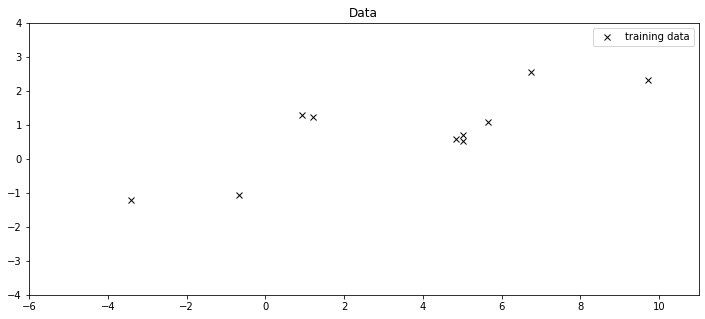

In [9]:
import numpy as np  # You will be using Numpy module
import matplotlib.pyplot as plt  # Module for visualization will also be used

# Define the true function for generating dummy dataset
def func(x):
    # Generate sample dataset from a linearly transformed sinusoidal function: y=sin(x)+0.3*x+e (where 'e' is random noise)
    return np.sin(x) + .3*x

# Define function for generating dummy dataset
def dummyData(func, sample_size, std):
    # Artificially generate input x
    x = np.random.rand(sample_size)[:,None]; x=x*15-5
    # Call function to generate response y
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y

# Generate dummy dataset
# 10 data points are created for model training, and another 5 are created to test the accuracy of the model
x_train, y_train = dummyData(func, 10, 0.25)

# Visualize the artificially generated dataset
plt.figure(figsize=(12,5))
plt.xlim([-6., 11])
plt.ylim([-4, 4])
plt.title('Data')
plt.plot(x_train,y_train,'kx',label='training data')
plt.legend()

### 0.1 Fitting models to the data

Now you start to fit models to the data as you always did ***pretending like*** without knowing the true model and with limited observations. You need to specify different models to fit the data. The simplest way is to fit a linear model to the data.

As you may already know, in *machine learning*, this procedure of fitting a model to data is referred as **training** session, as you try to *train* the model with a **loss function** to capture the patterns in the data. You need to first *train* the linear model, then predict values everywhere to visualize a line manifesting the linear model. Here is how you *train* the linear model using the Ordinary Least Squares (OLS) as your **loss function**.

Contretely, you are going to find optimal **θ**, which is (*θ<sub>1</sub>*, *θ<sub>2</sub>*), to minimize the difference between **Y** and **M(x) = θ<sub>1</sub> + θ<sub>2</sub>x**, or **M(X) = θ<sup>T</sup>X** in a **vectorized** representation, where **X** is (*1*, *x*). (*1*, *x*) is referred as a **designed matrix**, as it is designed by combining *1* and *x* to form a handy **vectorized** representation.

Please try to figure out how all these can be achieved by experimenting with the following codes.

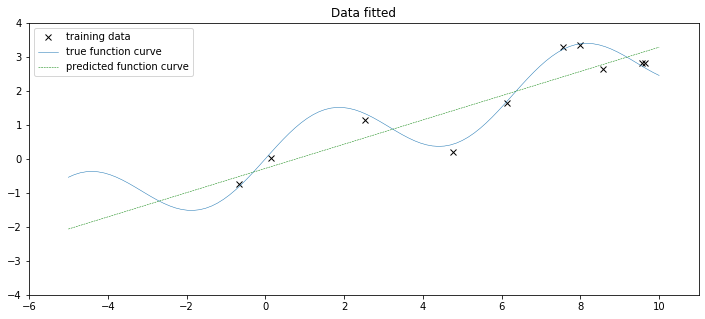

In [5]:
# Define a function to fit a linear model to the dummy data.
def fit(x, y):
    # x : (N, D) np.ndarray
    # y : (N,) np.ndarray
    # Linear fit means a linear model in the form of M(x) = θ1 + θ2x is assumed
    # Or, in the form of matrix multiplication M(X) = θ'X, where
    # X is referred as designed vector/matrix in the form of [1, x]' and θ is [θ1, θ2]'
    X_mat=np.hstack((np.ones(len(x)).reshape(-1,1), x))  # X_mat is a designed matrix
    
    # Given the observed data y, a proper solution of θ to M(x) can be: θ* = argmin (||y - X @ θ||^2_2)
    theta = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(y)  # If you see an @ in the middle of a line, that's matrix multiplication.
    var = np.mean(np.square(X_mat @ theta - y))
    return theta, var

def predict(x, theta, var, return_std:bool=False):
    X_mat=np.hstack((np.ones(len(x)).reshape(-1,1), x))  # X_mat is a designed matrix
    y = X_mat @ theta
    if return_std:
        y_std = np.sqrt(var) + np.zeros_like(y)
        return y, y_std
    return y

weights, variance = fit(x_train, y_train)

x_all = np.linspace(-5, 10, 100).reshape(-1,1)
y_predict = predict(x_all, weights, variance)

y_true = func(x_all)

plt.figure(figsize=(12,5))
plt.xlim([-6., 11])
plt.ylim([-4, 4])
plt.title('Data fitted')
plt.plot(x_train,y_train,'kx',label='training data')
plt.plot(x_all, y_true, linewidth=.5, label='true function curve')
plt.plot(x_all, y_predict, '--g', linewidth=.5, label='predicted function curve')
plt.legend()

### Short exercise 0.0

In the above example, you have attempted to train a linear model by using 10 observations, please try to generate another set of data, which may contain same, less or more amount of data points, using the same underlying true model, and fit your linear model again. Do you see some difference? What is the implication?

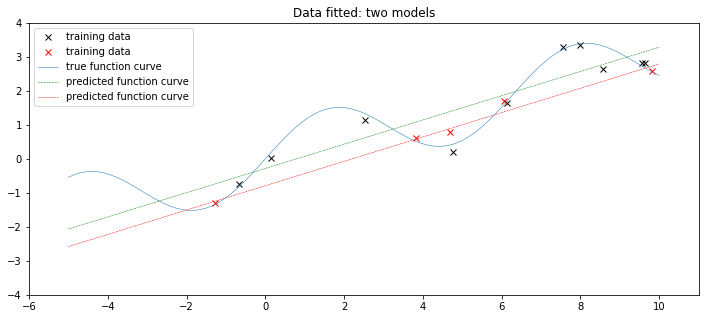

In [6]:
#==================================
# Answers and hints 0.1
#==================================

# Another set of observations
x_train2, y_train2 = dummyData(func, 5, 0.25)  # With less (only 5) observations
weights2, variance2 = fit(x_train2, y_train2)

x_all = np.linspace(-5, 10, 100).reshape(-1,1)
y_predict2 = predict(x_all, weights2, variance2)

y_true = func(x_all)

plt.figure(figsize=(12,5))
plt.xlim([-6., 11])
plt.ylim([-4, 4])
plt.title('Data fitted: two models')
plt.plot(x_train,y_train,'kx',label='training data')
plt.plot(x_train2,y_train2,'rx',label='training data')
plt.plot(x_all, y_true, linewidth=.5, label='true function curve')
plt.plot(x_all, y_predict, '--g', linewidth=.5, label='predicted function curve')
plt.plot(x_all, y_predict2, '--r', linewidth=.5, label='predicted function curve')
plt.legend()